<a href="https://colab.research.google.com/github/Hasibul321/AI_LAB/blob/main/assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementation of a simple deep neural network (DNN) for solving the polynomial y = 5x^3 -8x^2 -7x +1


#importing necessary modules


In [11]:
from keras.layers import Input,Dense
from keras.models import Model
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# DNN architecture (three hidden-layers of sizes 32, 64, and 128 and displaying the generated DNN with the required number of parameters.)

In [12]:
inputs = Input((1,))
h1 = Dense(32, activation = "relu")(inputs)
h2 = Dense(64, activation = "relu")(h1)
h3 = Dense(128, activation = "relu")(h2)
outputs = Dense(1, name = 'OutputLayer')(h3)

model = Model(inputs, outputs, name = 'Simple_deep_neural_network')
model.summary()

Model: "Simple_deep_neural_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_3 (Dense)             (None, 32)                64        
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 OutputLayer (Dense)         (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#generation of dataset with the condition of training samples within the range of -20 to +20 and normalizing the training data in the range of -1 to +1.

In [13]:
x = np.random.randint(-20, 20, 10000)
y = 5 * x**3 - 8 * x**2 - 7 * x + 1

x_data = (2 * (x - np.min(x)) / (np.max(x) - np.min(x))) - 1
y_data = (2 * (y - np.min(y)) / (np.max(y) - np.min(y))) - 1

# Using 5% data for validation and 5% data for testing .Remaining data are used to train the model

In [14]:
size = len(x_data)
x_train, y_train = x_data[: int(size * 0.9)] , y_data[: int(size * 0.9)]
x_validation, y_validation = x_data[int(size * 0.9) : int(size * 0.95)] , y_data[int(size * 0.9) : int(size * 0.95)]
x_test , y_test = x_data[int(size * 0.95) :] , y_data[int(size * 0.95) :]

#Training the model

In [15]:

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.R2Score(name='accuracy')])

trained_model = model.fit(x_train, y_train, epochs = 50,  validation_data=(x_validation, y_validation), verbose = 0)

# history of the trained model

In [16]:
history = trained_model.history
print(history)

{'loss': [0.01307093258947134, 0.00013304295134730637, 2.812833190546371e-05, 1.3252971257315949e-05, 7.5991401899955235e-06, 9.767719348019455e-06, 9.466801202506758e-06, 7.642913260497153e-06, 5.460248212330043e-05, 1.5807245290488936e-05, 8.142024853441399e-06, 1.1019081284757704e-05, 7.939105671539437e-06, 0.0001556317147333175, 5.558726115850732e-06, 5.259752924757777e-06, 3.999883574579144e-06, 6.015943654347211e-07, 1.694009370112326e-05, 4.23406163463369e-05, 4.802961939276429e-06, 2.4024654976528836e-06, 6.613181176362559e-05, 1.625440563657321e-05, 6.5374624682590365e-06, 3.645269316621125e-05, 2.881853333747131e-06, 5.743704036831332e-07, 1.773761323420331e-05, 4.267149961378891e-06, 5.360380237107165e-05, 5.087199679110199e-05, 9.423974915989675e-06, 1.87297439424583e-06, 8.55639086694282e-07, 2.388700522715226e-06, 1.0001352166000288e-05, 6.406593911378877e-06, 3.4453871194273233e-05, 6.533917257911526e-06, 4.4742904719896615e-05, 5.873293503100285e-06, 7.349048587457219e-

#displaying the result

16/16 [==============================] - 0s 3ms/step - loss: 1.1312e-06 - accuracy: 1.0000
Test Loss: 0.0000011
Test Accuracy: 99.99936%
16/16 [==============================] - 0s 2ms/step


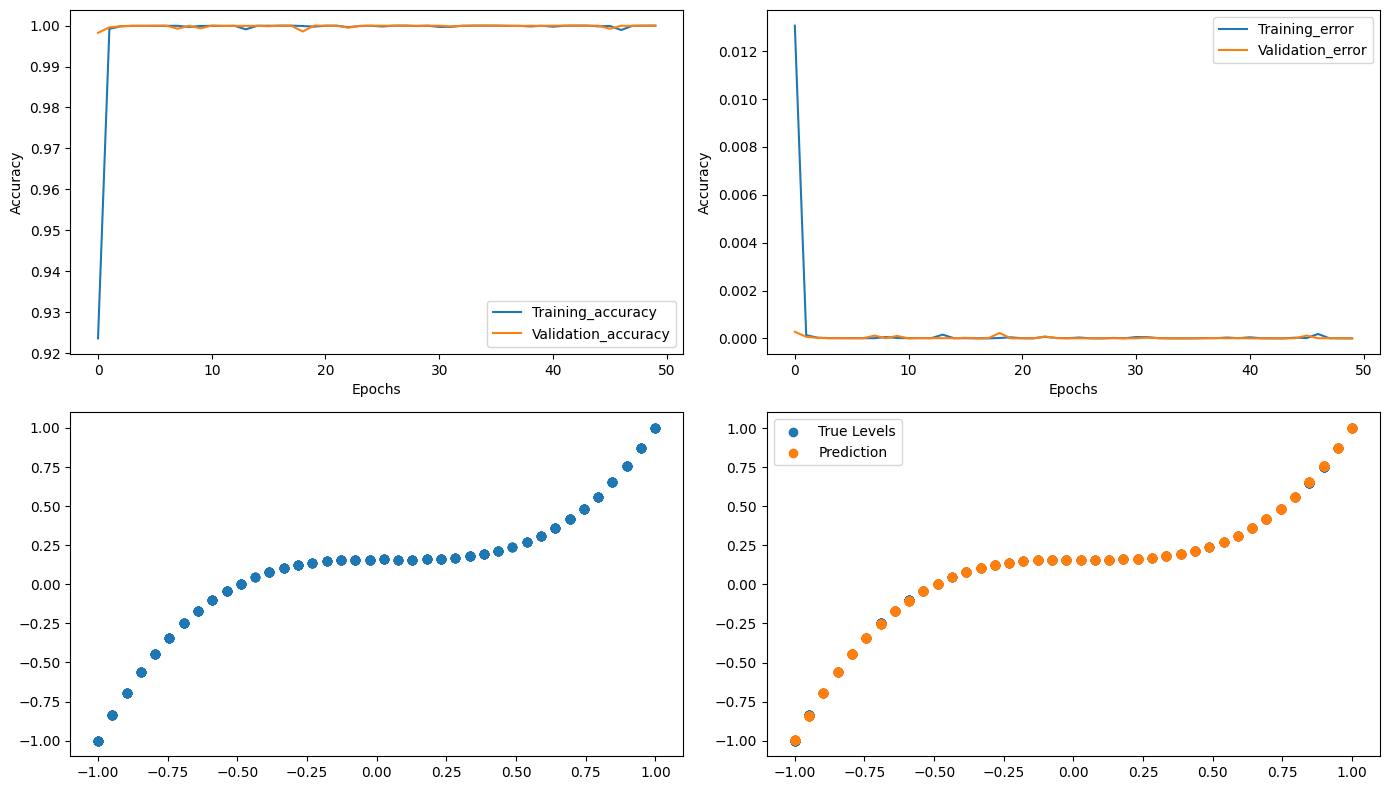

In [17]:

plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_accuracy', 'Validation_accuracy'])

# Plot Training and Validation Loss
plt.subplot(2,2,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_error', 'Validation_error'])

# plot
plt.subplot(2,2,3)
plt.scatter(x_test,y_test)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.5f}%")
# Predict on test data
predictions = model.predict(x_test)

# Plot prediction accuracy vs true levels
plt.subplot(2,2,4)
plt.scatter(x_test,y_test)
plt.scatter(x_test, predictions)
plt.legend(['True Levels','Prediction'])
plt.tight_layout()
plt.show()
